Before starting this example
----------------------------

You need to download the necessary data. First, register on [BRATS: The Visible Skeleton Database](https://www.smir.ch/BRATS/Start2012). Then download the archive under **BRATS 2 Training data**

How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment the code in the next cell.

In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [45]:
import numpy as np # Numpy for general purpose processing
import SimpleITK as sitk # SimpleITK to load images
import sys

sys.path.append('../../')
from pyLAR.alm.ialm import recover # Candes et al.’s RPCA approach

In [46]:
with open('./FLAIR_FILES.txt') as fid:
    im_names = fid.read().splitlines()
with open('./GT_FILES.txt') as fid:
    gt_names = fid.read().splitlines()

**Did you download the data?** If not, do it now.

**Update** the value of `data_folder` in the next cell to point to where your data was downloaded and extracted.

In [47]:
assert (len(im_names) > 0)
assert (len(gt_names) == len(im_names))
# load first image
data_folder = '/home/fbudin/Data/BRATS_from_Virtual_Skeleton_Databa_project/BRATS_Training/BRATS-2/Synthetic_Data/HG'

tmp = sitk.ReadImage(data_folder+'/'+im_names[0]) # image in SITK format
tmp = sitk.GetArrayFromImage(tmp) # get numpy array
z_dim, x_dim, y_dim = tmp.shape # get 3D volume shape
print tmp.shape
tmp = tmp.reshape(-1) # vectorize

(181, 256, 256)


In [48]:
T1 = np.zeros((len(tmp), len(im_names)))
print T1.shape
for i, im_file in enumerate(im_names):
    tmp = sitk.ReadImage(data_folder+'/'+im_file)
    tmp = sitk.GetArrayFromImage(tmp)
    T1[:,i] = tmp.reshape(-1)
# read the ground truth


GT = np.zeros(T1.shape)
for i, gt_file in enumerate(gt_names):
    tmp = sitk.ReadImage(data_folder+'/'+gt_file) # image in SITK format
    tmp = sitk.GetArrayFromImage(tmp) # get numpy array
    GT[:,i] = tmp.reshape(-1) # vectorize

(11862016, 25)


(181, 256, 256)


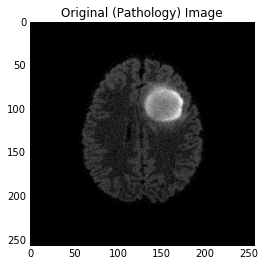

In [49]:
im=T1[:,0].reshape((z_dim,x_dim,y_dim))
print im.shape
slice_nr = 100
imshow(im[slice_nr,:,:], plt.cm.gray)
plt.title('Original (Pathology) Image')


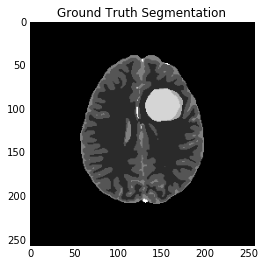

In [50]:
im = GT[:,0].reshape((z_dim,x_dim,y_dim))
imshow(im[slice_nr,:,:], cm.gray)
plt.title('Ground Truth Segmentation')


In [51]:
selection = [0,1,2,3,4,5,6,7,8,9]
num_of_data = len(selection)




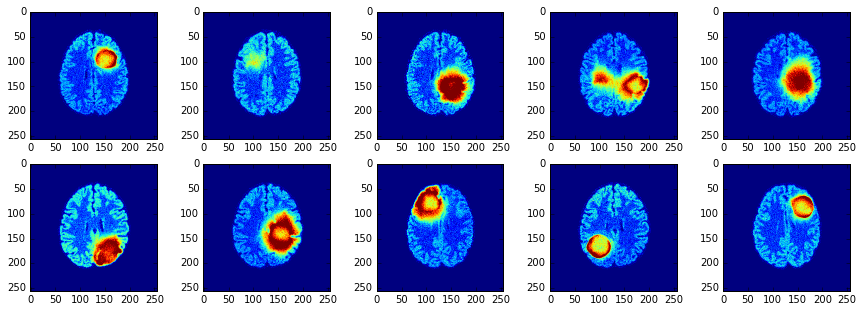

In [52]:
Y = T1[:,selection]
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(np.ceil(num_of_data/5.0),5,i+1)
    im = T1[:,selection[i]].reshape(z_dim,x_dim,y_dim)
    implot = imshow(im[slice_nr,:,:])
    implot.set_clim(0,2800)

In [ ]:
print Y.shape

(11862016, 10)


In [ ]:
gamma = 0.7* sqrt(float(Y.shape[1])/Y.shape[0])
print gamma

low_rank, sparse, n_iter, rank_est, non_zero, abs_sum_sparse = recover(Y,gamma)
print sparse.shape
print low_rank.shape

In [ ]:
print sparse.shape
print low_rank.shape

fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(np.ceil(num_of_data/5.0),5,i+1)
    im = np.asarray(sparse[:,i]).reshape(z_dim,x_dim,y_dim)
    implot = imshow(im[slice_nr,:,:])
    plt.title('Sparse Part')
    plt.colorbar()
    implot.set_clim(0,2800)

(11862016, 10)
(11862016, 10)


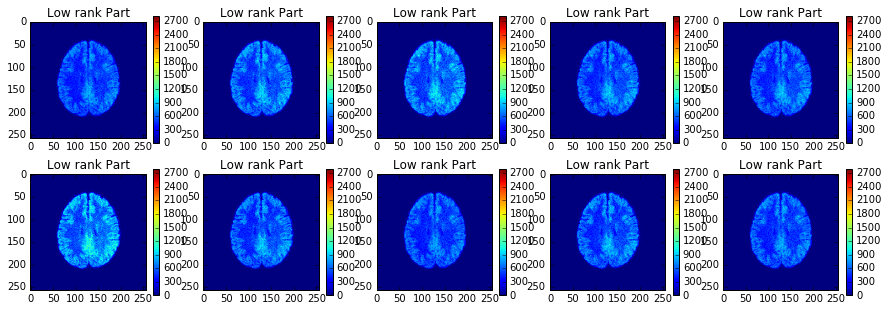

In [43]:
print low_rank.shape
print sparse.shape
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(np.ceil(num_of_data/5.0),5,i+1)
    im = np.abs(np.asarray(low_rank[:,i]).reshape((z_dim,x_dim,y_dim)))
    implot = imshow(im[slice_nr,:,:])
    plt.title('Low rank Part')
    plt.colorbar()
    implot.set_clim(0,2800)